# Data Science and Business Analytics GRIP SEPT'21
# Prediction using Supervised ML 

## Task 1 - To predict the percentage of a student based on the no. of study hours per day.  
## Author - Ammish Tandon
**Dataset Link** -http://bit.ly/w-data


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

### Exploring the Dataset

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Hours and Scores are very highly positively correlated.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Data Cleaning

First I'll check for any outliers present in the dataset. We can do this visually using a scatterplot.

Text(0, 0.5, 'Percentage Score')

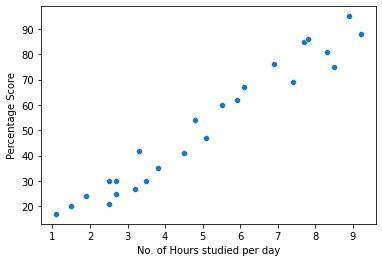

In [7]:
sns.scatterplot(data = df, x = "Hours", y = "Scores")
plt.xlabel("No. of Hours studied per day")
plt.ylabel("Percentage Score")

We can clearly see that all of the data points follow the general trend of the data. Hence, they are no outliers.

Now I'll check for any missing values in the dataset.

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Clearly, there are no Missing Values in the dataset.

Now I'll check for any categorical data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see, there are no categorical features present hence we don't require to convert any data to dummy variables.

The data is ready to be trained on.

## Regression Task

As we can see that there is only 1 feature (Hours) present in the dataset and also the scatterplot shows somewhat of a Linear Relationship between Hours and Scores, we'll use the Simple Linear Regression Algorithm for the task.

### Train | Test Split

In [10]:
X = df["Hours"]  # Feature

In [11]:
X = X.values.reshape(len(X), 1)  # The model expects a 2D feature array so I'm reshaping it.

In [12]:
y = df["Scores"]  # Label

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

As there is only 1 feature in the dataset, we don't need to scale the data.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

### Training Model using Training Set

In [17]:
model.fit(X_train, y_train) # Fitting the model on the training data.

LinearRegression()

### Predicting Label using Test Set

In [18]:
test_predictions = model.predict(X_test)

### Evaluating Model Performance

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))  # Root Mean Squared Error

In [21]:
df["Scores"].mean()

51.48

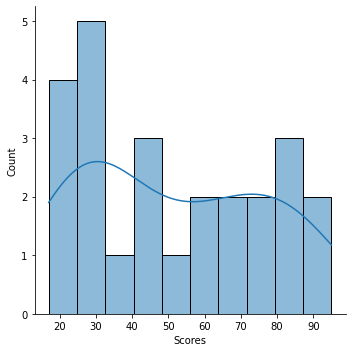

In [22]:
sns.displot(data = df, x = "Scores", bins = 10, kde = True)

In [23]:
comparison = pd.DataFrame({"Actual_Scores": y_test, "Predicted_Scores": test_predictions}).reset_index().drop("index", axis = 1)
comparison

,Actual_Scores,Predicted_Scores
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [24]:
MAE  # Mean Absolute Error

3.9207511902099244

In [25]:
RMSE   # Root Mean Squared Error

4.352380006653288

I'm satisfied with my model's performance so now I'll re-train my model on the complete data.

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X, y)

LinearRegression()

In [28]:
final_model.coef_  # B1

array([9.77580339])

In [29]:
final_model.intercept_  # B0

2.48367340537321

Text(0.5, 1.0, 'Best Fit Line')

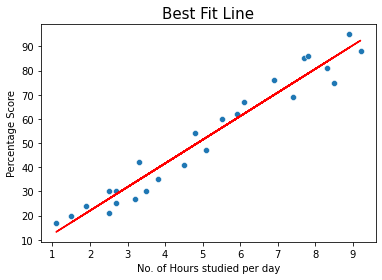

In [30]:
y_hat = final_model.intercept_ + final_model.coef_[0] * X   # y_hat = B0 + B1*X
sns.scatterplot(data = df, x = "Hours", y = "Scores")
plt.plot(X, y_hat, color = "red")
plt.xlabel("No. of Hours studied per day")
plt.ylabel("Percentage Score")
plt.title("Best Fit Line", fontsize = 15)

## Model Deployment

In [31]:
from joblib import dump, load

In [32]:
dump(final_model, "TestScoresPredictor.joblib")

['TestScoresPredictor.joblib']

In [33]:
loaded_model = load("TestScoresPredictor.joblib")

**Predicting the score of a student who studies 9.25 hours per day.**

In [34]:
loaded_model.predict([[9.25]])  # Since the model was trained on 2D feature, hence it expects a 2D feature to be passed.

array([92.90985477])

**Hence, the predicted score is 92.90 %.**